In [27]:
import numpy as np
import pandas as pd
import scipy as sp
from math import prod
import matplotlib.pyplot as plt

Here we explore a slightly modified setup. We consider that our underlying state, x, is a binary indicating whether we are in a recession or not. The state space evolution is now slightly modified to
$$x_{t+1} = (\chi[\sigma > \theta] - x_t)^2$$

This setup can be interpretted to be saying that the state, recession, persists unless a sufficiently large shock moves it (which perhaps is contradictory to the understanding that the state heads towards a steady value which is perturbed by shocks).

The observation setup remains the same, 
$$y_t = G x_t + \rho$$

Thus, given the distribution of ρ we can get probability that the observed $y_t$ were generated by each value of $x_t$. However, multiply these by the probability of that $x_t$ given $\widehat{x_{t-1}}$ and distribution of $σ$ ( essentially $P(x_t|\widehat{x_{t-1}})$). 

let $π(X) = P(X|\widehat{x_{t-1}})P(X|y_t)$

Then, $$\widehat{x_{t+1}} = argmax(π(X))$$ $$E[x_{t+1}] = π(1)$$ $$var(x_{t+1}) = $$

Little abuse of notation
   
Given this setup, our objective is to estimate G matrix to maximize the accuracy given our data. I expect to find that the weights on variables that lead a recession are the highest. 

Obv this is not a Kalman Filter but just an alternate way of approaching the problem. Notice, that this problem never converges? in the sense that the $var(x_t) < var(x_{t-1})$ need not be true

I wonder if underlying state setup can be modified to mimic alternate RBC fomulation

In [2]:
df = pd.read_csv('logged_data.csv')

In [3]:
df

,DATE,nber_recessions,real_personal_income_less_transfers,real_pce,real_gdp,real_gdi,real_avg_gdp_gdi,total_nonfarm_emp,emp_level,industrial_prod_index,real_manuf_trade_sales,log_real_personal_income_less_transfers,log_real_pce,log_real_gdp,log_real_gdi,log_real_avg_gdp_gdi,log_total_nonfarm_emp,log_emp_level,log_industrial_prod_index,log_real_manuf_trade_sales
0,1967Q1,0,3320.063,2715.303,4538.498,4498.858,4518.678,65455.0,73572.0,35.0,384861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1967Q2,0,3337.162,2752.426,4541.280,4523.614,4532.447,65612.0,74001.0,35.0,386712.0,0.020548,0.054317,0.002451,0.021951,0.012170,0.009583,0.023256,0.000000,0.019192
2,1967Q3,0,3374.102,2766.518,4584.246,4571.156,4577.701,66065.0,74714.0,35.0,389923.0,0.044034,0.020427,0.037667,0.041820,0.039740,0.027522,0.038356,0.000000,0.033076
3,1967Q4,0,3400.459,2783.447,4618.812,4617.266,4618.039,66609.0,75216.0,36.0,399816.0,0.031125,0.024402,0.030048,0.040147,0.035093,0.032802,0.026786,0.112684,0.100221
4,1968Q1,0,3454.932,2850.153,4713.013,4685.771,4699.392,67105.0,75103.0,36.0,405296.0,0.063569,0.094730,0.080760,0.058911,0.069852,0.029675,-0.006014,0.000000,0.054453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2021Q3,0,14491.631,13874.396,19672.594,19784.132,19728.363,147186.0,153287.0,101.0,1554756.0,0.024862,0.029140,0.026182,0.044589,0.035401,0.055277,0.048331,0.039801,-0.003500
219,2021Q4,0,14589.595,13981.514,20006.181,20108.233,20057.207,149158.0,155337.0,102.0,1561165.0,0.026949,0.030764,0.067259,0.064997,0.066125,0.053236,0.053140,0.039409,0.016455
220,2022Q1,0,14507.513,14028.383,19924.088,20147.177,20035.632,150847.0,157680.0,103.0,1570846.0,-0.022568,0.013386,-0.016447,0.007739,-0.004305,0.045040,0.059883,0.039025,0.024728
221,2022Q2,0,14453.732,14099.456,19895.271,20107.480,20001.376,152044.0,158113.0,104.0,1543149.0,-0.014856,0.020214,-0.005790,-0.007889,-0.006845,0.031615,0.010969,0.038648,-0.071157


In [4]:
def predict(G, y_1, x_0, p, mean, sd):
    G = np.asarray(G)
    y_1 = np.asarray(y_1)
    
    π_x0 = p * prod(sp.stats.norm.pdf((y_1 - G*x_0 - mean)/sd))
    π_x1 = (1-p) * prod(sp.stats.norm.pdf((y_1 - G*int(not bool(x_0)) - mean)/sd))
    
    return x_0 if π_x0 >  π_x1 else int(not bool(x_0)), π_x0, π_x1

In [5]:
#y1 = np.log(np.array(df['log_real_gdp'][1:]/np.array(df['log_real_gdp'][:-1])))
#y1 = y1 - np.mean(y1)

#y2 = np.log(np.array(df['log_emp_level'][1:]/np.array(df['log_emp_level'][:-1])))
#y2 = y2 - np.mean(y2)

#y3 = np.array(df['log_real_pce'][1:]/np.array(df['log_real_pce'][:-1]))
#y3 = y3 - np.mean(y3)

C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_2304\3824504590.py:1: RuntimeWarning: invalid value encountered in log
  y1 = np.log(np.array(df['log_real_gdp'][1:]/np.array(df['log_real_gdp'][:-1])))
C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_2304\3824504590.py:4: RuntimeWarning: invalid value encountered in log
  y2 = np.log(np.array(df['log_emp_level'][1:]/np.array(df['log_emp_level'][:-1])))


In [15]:
y1 = np.array(df['log_real_gdp'][1:])
y2 = np.array(df['log_emp_level'][1:])
y3 = np.array(df['log_real_pce'][1:])

In [16]:
[np.std(y1), np.std(y2), np.std(y3)]

[0.04453289885746138, 0.045384043865784686, 0.044478425329520885]

In [17]:
y1[1],y2[1],y3[1]

(0.0376669290075491, 0.0383555371365715, 0.0204271405917145)

In [23]:
np.mean(y1), np.mean(y2), np.mean(y3)

(0.026772352702360974, 0.01384058227002639, 0.029780676687487864)

In [18]:
predict([1,1,1], [y1[1],y2[1],y3[1]], 0, 0.5, 0, [np.std(y1), np.std(y2), np.std(y3)])

(0, 0.013978219574333026, 1.9154563723806266e-306)

In [19]:
def filtering(G, y, x_0, p):
    x = []
    x.append(x_0)
    
    m = []
    sd = []
    for i in range(len(y)):
        m.append(np.mean(y[i]))
        sd.append(np.std(y[i]))
        
    yt = []
    for i in range(len(y[1])):
        temp = []
        for j in range(len(y)):
            temp.append(y[j][i])
        yt.append(temp)
    
    for i in yt:
        xTemp, πx, π1x = predict(G, i, x[-1], p, m, sd)
        #print(xTemp, πx, π1x)
        
        x.append(xTemp)
    
    return x

In [24]:
filtering([0.026772352702360974, 0.01384058227002639, 0.029780676687487864], [y1,y2,y3], 0, 0.6)

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0]

In [25]:
def loss(G, y, x_0, p, data):
    return sum((np.array(data['nber_recessions']) - np.array(filtering(G, y, x_0, p)))**2)

In [26]:
loss([0.026772352702360974, 0.01384058227002639, 0.029780676687487864], [y1,y2,y3], 0, 0.6, df)

85

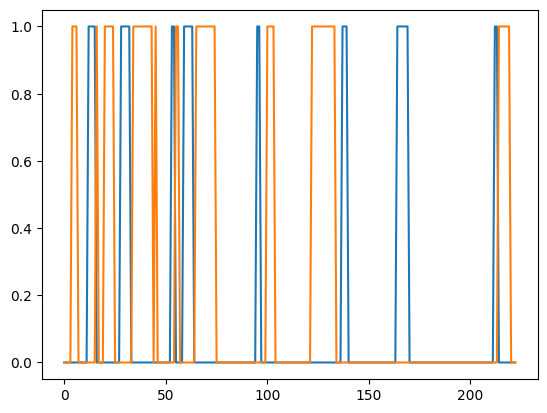

In [38]:
plt.plot(range(len(df['nber_recessions'])), df['nber_recessions'])
plt.plot(range(len(df['nber_recessions'])), filtering([0.027, 0.014, 0.03], [y1,y2,y3], 0, 0.6))
plt.show()